In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

news = pd.read_csv('articles.csv')
news['date'] = pd.to_datetime(news['date'])
news.head(3)

title  \
0  Lula diz que está 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Três reportagens da Folha ganham Prêmio Petrob...   

                                                text       date   category  \
0  Com a possibilidade de uma condenação impedir ... 2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines... 2017-09-10  ilustrada   
2  Três reportagens da Folha foram vencedoras do ... 2017-09-10      poder   

  subcategory                                               link  
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...  
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...

In [2]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167053 entries, 0 to 167052
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   title        167053 non-null  object        
 1   text         166288 non-null  object        
 2   date         167053 non-null  datetime64[ns]
 3   category     167053 non-null  object        
 4   subcategory  29635 non-null   object        
 5   link         167053 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 7.6+ MB


In [3]:
news.describe(include="all",datetime_is_numeric=True)

title                                               text  \
count       167053                                             166288   
unique      164119                                             165901   
top     Quadrinhos  Toda segunda-feira, "Tec" divulga os mais lega...   
freq           627                                                 25   
mean           NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                                 date category       subcategory  \
count                          167053   167053             29635   
unique                            NaN       48               293   
top                               NaN    poder  olimpiada-no-rio   
freq                              NaN    22022              2859   
mean    2016-03-26 10:39:53.391319040      NaN               NaN   
min               2015-01-01 00:00:00      NaN               NaN   
25%               2015-07-25 00:00:00      NaN               NaN   
50%               2016-03-04 00:00:00      NaN               NaN   
75%               2016-11-08 00:00:00      NaN               NaN   
max               2017-10-01 00:00:00      NaN               NaN   

                                                     link  
count                                              167053  
unique                                             167053  
top     http://www1.folha.uol.com.br/saopaulo/2017/01/...  
freq                                                    1  
mean                                                  NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

# Tratamento NaN

In [4]:
#Exiba todas as linhas com valores em branco (NaN).
len(news[news.isna().any(axis=1)])

137442

In [5]:
news = news.dropna(subset=['text'])
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166288 entries, 0 to 167052
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   title        166288 non-null  object        
 1   text         166288 non-null  object        
 2   date         166288 non-null  datetime64[ns]
 3   category     166288 non-null  object        
 4   subcategory  29611 non-null   object        
 5   link         166288 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 8.9+ MB


# Tratamento Repetidos 

In [6]:
#verificando se há repetidos 
news.groupby(['text', 'date']).count().sum()

title          166288
category       166288
subcategory     29611
link           166288
dtype: int64

In [7]:
news.groupby(['text']).count().sum()

title          166288
date           166288
category       166288
subcategory     29611
link           166288
dtype: int64

# title 

In [8]:
import nltk
from nltk.tokenize import word_tokenize
import unicodedata

def remove_acentos(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords = [remove_acentos(palavra) for palavra in stopwords]

def normaliza_texto(txt):
    return ' '.join([word for word in word_tokenize(str.lower(remove_acentos(txt))) if word not in stopwords and word.isalpha()])

news['title_norm'] = news.apply(lambda linha: normaliza_texto(str(linha['title'])), axis = 1)


news.head()

title  \
0  Lula diz que está 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Três reportagens da Folha ganham Prêmio Petrob...   
3  Filme 'Star Wars: Os Últimos Jedi' ganha trail...   
4  CBSS inicia acordos com fintechs e quer 30% do...   

                                                text       date   category  \
0  Com a possibilidade de uma condenação impedir ... 2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines... 2017-09-10  ilustrada   
2  Três reportagens da Folha foram vencedoras do ... 2017-09-10      poder   
3  A Disney divulgou na noite desta segunda-feira... 2017-09-10  ilustrada   
4  O CBSS, banco da holding Elopar dos sócios Bra... 2017-09-10    mercado   

  subcategory                                               link  \
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...   
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   
3         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...   
4         NaN  http://www1.folha.uol.com.br/mercado/2017/10/1...   

                                          title_norm  
0                lula diz ainda forca cabo eleitoral  
1  ser escrava mulheres sofrem diz cantora oumou ...  
2  tres reportagens folha ganham premio petrobras...  
3  filme wars ultimos jedi ganha trailer definiti...  
4  cbss inicia acordos fintechs quer credito digital

In [9]:
news.head(40)['title_norm']

0                   lula diz ainda forca cabo eleitoral
1     ser escrava mulheres sofrem diz cantora oumou ...
2     tres reportagens folha ganham premio petrobras...
3     filme wars ultimos jedi ganha trailer definiti...
4     cbss inicia acordos fintechs quer credito digital
5     encontro bono pergunta macri sobre argentino d...
6          posso sair brasil quiser diz cesare battisti
7     tite diz querer seguir selecao apos mundial ru...
8     supremo nega pedido senado analisar impeachmen...
9     teste whatsapp business permite empresas facam...
10    dodge defende manter joesley saud jbs presos p...
11    incendios deixam mortos atingem cidades vinico...
12       bndes descarta irregularidades emprestimos jbs
13    apple cita fornecedor frances antes discutir i...
14       volkswagen crescimento ano diz novo presidente
15    policia rio prende seguranca chefe trafico fav...
16       juiz decreta prisao nuzman tempo indeterminado
17    apos anos execucao che ainda assombra povo

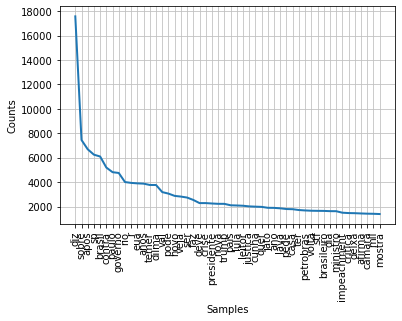

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [10]:
title_norm_join = ' '.join(news['title_norm'])
title_norm_join

from nltk.probability import FreqDist

freqDist = FreqDist(title_norm_join.split(" "))
freqDist.plot(50)

# text 

In [11]:
import nltk
from textblob import TextBlob
blob = TextBlob("As I walked through Northlake Mall I was captivated by the sweet aroma of the delightful fragrances that illuminated from the store.  \n\nAs I drew closer I saw the sale signs throughout the store and on the signature items and I knew right there that...")
# print(blob.tags)
blob.tags
blob.np_counts

defaultdict(int,
            {'northlake': 1,
             'sweet aroma': 1,
             'delightful fragrances': 1,
             'sale signs': 1,
             'signature items': 1})

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# realiza a análise de sentimento para cada registro 
analyzer= SentimentIntensityAnalyzer()
analyzer.polarity_scores("good true nice job")

{'neg': 0.0, 'neu': 0.105, 'pos': 0.895, 'compound': 0.8176}

In [38]:
news['text_norm'] = news.apply(lambda linha: normaliza_texto(str(linha['text'])), axis = 1)
news.head(3)

title  \
0  Lula diz que está 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Três reportagens da Folha ganham Prêmio Petrob...   

                                                text       date   category  \
0  Com a possibilidade de uma condenação impedir ... 2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines... 2017-09-10  ilustrada   
2  Três reportagens da Folha foram vencedoras do ... 2017-09-10      poder   

  subcategory                                               link  \
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...   
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...   

                                          title_norm  \
0                lula diz ainda forca cabo eleitoral   
1  ser escrava mulheres sofrem diz cantora oumou ...   
2  tres reportagens folha ganham premio petrobras...   

                                           text_norm  
0  possibilidade condenacao impedir candidatura l...  
1  oumou sangare cantora ativista malinesa sofrim...  
2  tres reportagens folha vencedoras premio petro...

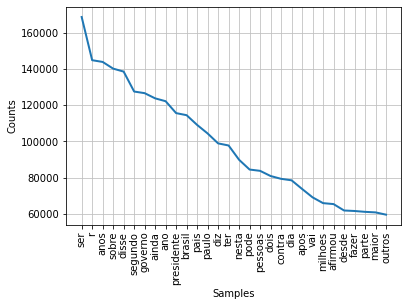

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
text_norm_join = ' '.join(news['text_norm'])
text_norm_join


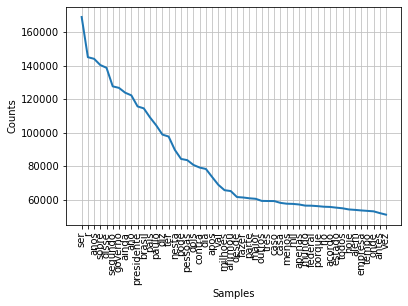

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [40]:
text_freqDist = FreqDist(text_norm_join.split(" "))
text_freqDist.plot(50)

In [ ]:
news.to_csv('articles_.csv')

# date 

In [13]:
news['date'].max()

Timestamp('2017-10-01 00:00:00')

In [14]:
news['date'].min()

Timestamp('2015-01-01 00:00:00')

In [15]:
news.groupby('date').count()['text']

date
2015-01-01    179
2015-01-02    235
2015-01-03    211
2015-01-04    200
2015-01-05    150
             ... 
2017-09-27    163
2017-09-28    172
2017-09-29    148
2017-09-30     99
2017-10-01    120
Name: text, Length: 987, dtype: int64

<AxesSubplot:xlabel='date'>

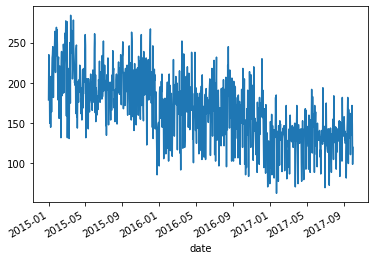

In [16]:
news.groupby('date').count()['text'].plot()

<AxesSubplot:>

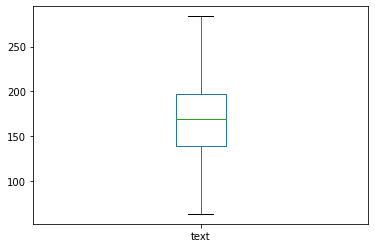

In [17]:
news.groupby('date').count()['text'].plot.box()

 News by month

In [18]:
news_by_days = news.groupby('date').count()['text']
news_by_days = news_by_days.reset_index()

news_by_month = news_by_days.groupby([news_by_days['date'].dt.year.rename('y'), news_by_days['date'].dt.month.rename('m')]).sum()

news_by_month.head(3)

text
y    m      
2015 1  6736
     2  5932
     3  6723

<AxesSubplot:xlabel='y,m'>

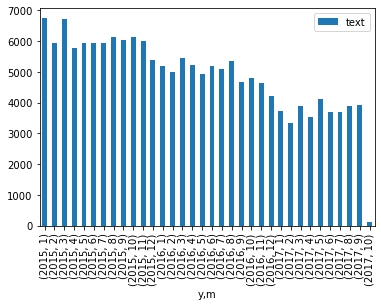

In [19]:
news_by_month.plot.bar()

<AxesSubplot:>

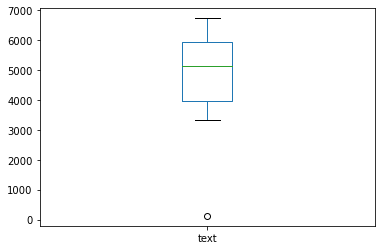

In [20]:
news_by_month.plot.box()

news by week 

In [21]:
news_by_week = news_by_days.groupby([news_by_days.date.dt.year,news_by_days.date.dt.strftime('%W')]).sum()
news_by_week.head(3)

text
date date      
2015 00     825
     01    1252
     02    1550

In [22]:
news_by_week.describe()

text
count   146.000000
mean   1138.958904
std     271.639870
min     117.000000
25%     959.500000
50%    1164.500000
75%    1350.750000
max    1662.000000

<AxesSubplot:xlabel='date,date'>

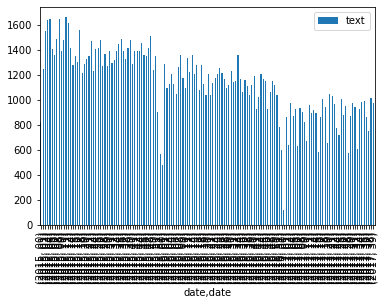

In [23]:
news_by_week.plot.bar()

<AxesSubplot:>

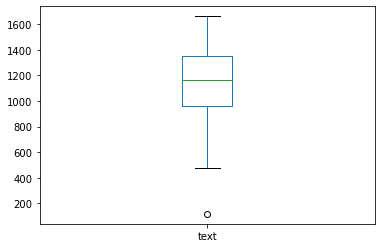

In [24]:
news_by_week.plot.box()

# category 

In [25]:
news['category'].unique()

array(['poder', 'ilustrada', 'mercado', 'mundo', 'esporte', 'tec',
       'cotidiano', 'ambiente', 'equilibrioesaude', 'sobretudo',
       'colunas', 'educacao', 'tv', 'banco-de-dados', 'opiniao',
       'ciencia', 'paineldoleitor', 'saopaulo', 'ilustrissima',
       'seminariosfolha', 'turismo', 'empreendedorsocial', 'serafina',
       'asmais', 'o-melhor-de-sao-paulo', 'bbc', 'comida', 'folhinha',
       'especial', 'treinamento', 'multimidia', 'cenarios-2017',
       'topofmind', 'dw', 'ombudsman', 'mulher',
       'guia-de-livros-discos-filmes', 'treinamentocienciaesaude', 'rfi',
       'vice', 'bichos', 'euronews', 'guia-de-livros-filmes-discos',
       'infograficos'], dtype=object)

In [26]:
len(news['category'].unique())

44

In [27]:
news.groupby('category').count()['text'].sort_values(ascending=False)

category
poder                           22022
colunas                         21619
mercado                         20970
esporte                         19730
mundo                           17130
cotidiano                       16967
ilustrada                       15617
opiniao                          4525
paineldoleitor                   4011
saopaulo                         3955
tec                              2260
tv                               2123
educacao                         2118
turismo                          1903
ilustrissima                     1409
ciencia                          1335
equilibrioesaude                 1312
sobretudo                        1057
bbc                               980
folhinha                          875
empreendedorsocial                841
comida                            828
asmais                            547
ambiente                          491
seminariosfolha                   379
serafina                          331
o-m

<AxesSubplot:>

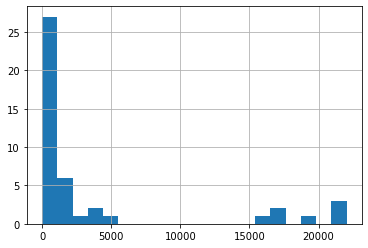

In [28]:
news.groupby('category').count()['text'].hist(bins=20)

<AxesSubplot:>

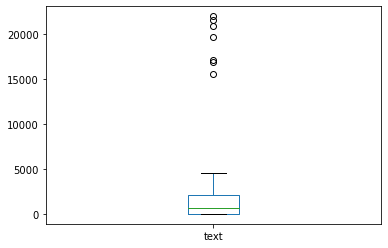

In [29]:
news.groupby('category').count()['text'].plot.box()

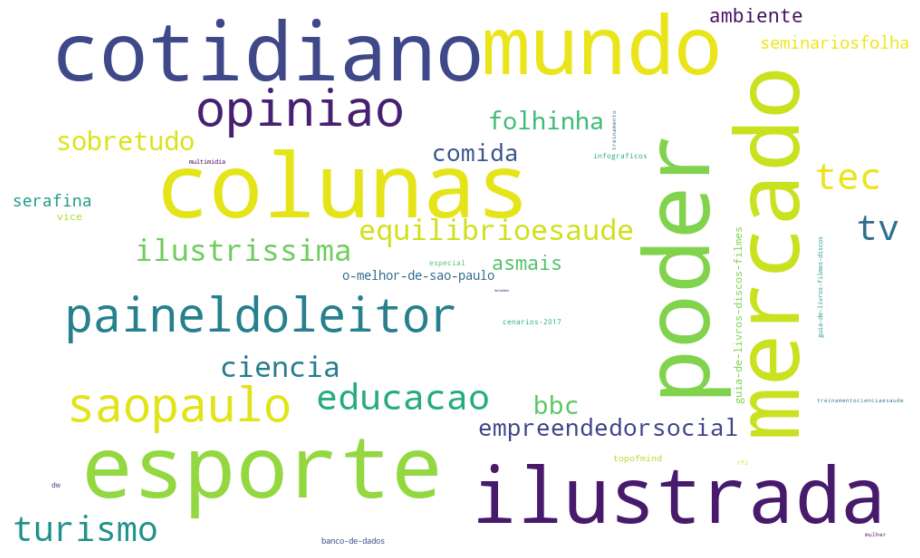

In [30]:
dicionario = {}
for index, x in news.groupby('category').count().iterrows():  
    dicionario[index] = x['title']

# cria uma nuvem de palabras através do dicionário 
wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", width=1000, height=600)
wordcloud.generate_from_frequencies(frequencies=dicionario)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# subcategory

In [31]:
len(news['subcategory'].unique())

293

In [32]:
news.groupby('subcategory').count()['text'].sort_values(ascending=False).head(20)

subcategory
olimpiada-no-rio       2859
monicabergamo          2617
mercadoaberto          1035
eleicoes-2016           939
josesimao               694
helioschwartsman        663
bernardomellofranco     633
vaivem                  618
viniciustorres          543
clovisrossi             512
ruycastro               464
hoje                    421
eliogaspari             405
jucakfouri              388
morar                   353
tvfolhaaovivo           344
cotidiano               343
janiodefreitas          311
poder                   307
carodinheiro            303
Name: text, dtype: int64

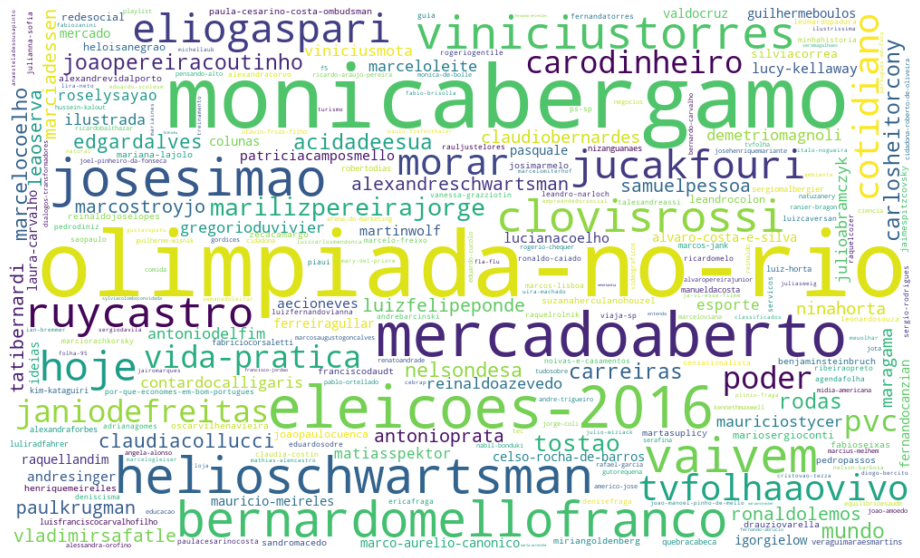

In [33]:
dicionario = {}
for index, x in news.groupby('subcategory').count().iterrows():  
    dicionario[index] = x['title']

# cria uma nuvem de palabras através do dicionário 
wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white", width=1000, height=600)
wordcloud.generate_from_frequencies(frequencies=dicionario)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# category, subcategory

In [34]:
news.groupby(['category', 'subcategory']).count()['text'].sort_values(ascending=False).head(40)

category        subcategory        
esporte         olimpiada-no-rio       2859
colunas         monicabergamo          2617
                mercadoaberto          1035
poder           eleicoes-2016           939
colunas         josesimao               694
                helioschwartsman        663
                bernardomellofranco     633
                vaivem                  618
                viniciustorres          543
                clovisrossi             512
                ruycastro               464
saopaulo        hoje                    421
colunas         eliogaspari             405
                jucakfouri              388
sobretudo       morar                   353
tv              tvfolhaaovivo           344
                cotidiano               343
colunas         janiodefreitas          311
tv              poder                   307
colunas         carodinheiro            303
sobretudo       vida-pratica            298
colunas         pvc                     

In [35]:
news.query('category == "colunas"').groupby(['category', 'subcategory']).count()['text'].sort_values(ascending=False).head(10)

category  subcategory        
colunas   monicabergamo          2617
          mercadoaberto          1035
          josesimao               694
          helioschwartsman        663
          bernardomellofranco     633
          vaivem                  618
          viniciustorres          543
          clovisrossi             512
          ruycastro               464
          eliogaspari             405
Name: text, dtype: int64

# link 

In [36]:
len(news['link'].unique())

166288

In [37]:
len(news[news['link'].str.contains('folha.uol', regex=False)])

166288